In [33]:
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import statistics
import numpy as np
import matplotlib.ticker as mticker

In [34]:
yf.pdr_override()
year = 1980
start = dt.datetime(year,1,1)
now = dt.datetime.now()

stock = input("Enter a stock symbol: ")

Enter a stock symbol: AAPL


[*********************100%%**********************]  1 of 1 completed
Enter an sma: 50
Enter warning limit: 10
2.0708280516294466
11.581036795426641


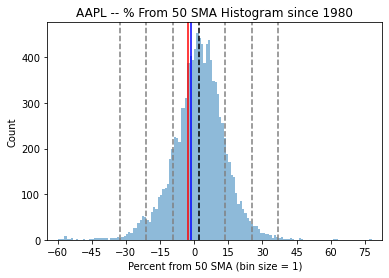

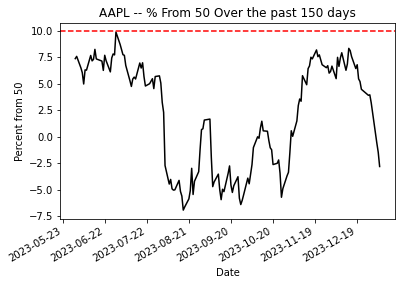

Enter a stock symbol: quit


In [36]:
while stock != "quit":
    
    fig, ax1 = plt.subplots()
    
    df = pdr.get_data_yahoo(stock, start, now)
    
    sma = int(input("Enter an sma: "))
    limit = int(input("Enter warning limit: "))
    
    df["SMA_"+str(sma)] = df.iloc[:,4].rolling(window = sma).mean()
    df['PC'] = ((df["Adj Close"]/df["SMA_"+str(sma)])-1)*100
    
    mean = df["PC"].mean()
    stdev = df["PC"].std()
    
    current = df["PC"][-1]
    yday = df["PC"][-2]
    
    print(mean)
    print(stdev)
    
    bins = np.arange(-100,100,1)
    
    plt.xlim([df["PC"].min()-5, df["PC"].max()+5])
    
    plt.hist(df["PC"], bins = bins, alpha = 0.5)
    plt.title(stock+" -- % From "+ str(sma)+" SMA Histogram since "+str(year))
    plt.xlabel("Percent from "+str(sma) + " SMA (bin size = 1)")
    plt.ylabel("Count")
        
    plt.axvline(x = mean, ymin = 0, ymax = 1, color = 'k', linestyle = '--')
    plt.axvline(x = mean + stdev, ymin = 0, ymax = 1, color = 'gray', linestyle = '--')
    plt.axvline(x = mean + stdev*2, ymin = 0, ymax = 1, color = 'gray', linestyle = '--')
    plt.axvline(x = mean + stdev*3, ymin = 0, ymax = 1, color = 'gray', linestyle = '--')

    plt.axvline(x = mean - stdev, ymin = 0, ymax = 1, color = 'gray', linestyle = '--')
    plt.axvline(x = mean - stdev*2, ymin = 0, ymax = 1, color = 'gray', linestyle = '--')
    plt.axvline(x = mean - stdev*3, ymin = 0, ymax = 1, color = 'gray', linestyle = '--')

    plt.axvline(x = current, ymin = 0, ymax = 1, color = 'r')
    plt.axvline(x =yday, ymin = 0, ymax = 1, color = 'blue')
    
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(14))
    
    fig2, ax2 = plt.subplots()
    
    df = df[-150:]
    
    df["PC"].plot(label = "close", color = "k")
    plt.title(stock+" -- % From "+str(sma)+" Over the past 150 days")
    plt.xlabel("Date")
    plt.ylabel("Percent from "+str(sma))
    
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(8))
    plt.axhline(y = limit, xmin = 0, xmax = 1, color = 'r', linestyle = '--')

    plt.show()
    
    stock = input("Enter a stock symbol: ")